In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basedir = '/content/drive/MyDrive/Dissertation/Datasets'

In [4]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'Rahmstorf et al. (2015).csv'))

In [5]:
df = load_csv('/content/drive/MyDrive/Dissertation/Datasets')

In [6]:
df

year  Amoc Index [K]   2-sigma  lower bound 95%  upper bound 95%
0      900        0.463314  0.667975        -0.463314         1.131288
1      901        0.554746  0.667975        -0.554746         1.222721
2      902        0.635653  0.667975        -0.635653         1.303628
3      903        0.698950  0.667975        -0.698950         1.366925
4      904        0.741313  0.667975        -0.741313         1.409288
...    ...             ...       ...              ...              ...
1091  1991       -0.483162  0.722766         0.483162         0.239604
1092  1992       -0.474055  0.722766         0.474055         0.248711
1093  1993       -0.417709  0.722766         0.417709         0.305057
1094  1994       -0.316160  0.722766         0.316160         0.406606
1095  1995       -0.182503  0.722766         0.182503         0.540264

[1096 rows x 5 columns]

In [7]:
df.shape

(1096, 5)

In [8]:
df.head()

year  Amoc Index [K]   2-sigma  lower bound 95%  upper bound 95%
0   900        0.463314  0.667975        -0.463314         1.131288
1   901        0.554746  0.667975        -0.554746         1.222721
2   902        0.635653  0.667975        -0.635653         1.303628
3   903        0.698950  0.667975        -0.698950         1.366925
4   904        0.741313  0.667975        -0.741313         1.409288

In [9]:
df.tail()

year  Amoc Index [K]   2-sigma  lower bound 95%  upper bound 95%
1091  1991       -0.483162  0.722766         0.483162         0.239604
1092  1992       -0.474055  0.722766         0.474055         0.248711
1093  1993       -0.417709  0.722766         0.417709         0.305057
1094  1994       -0.316160  0.722766         0.316160         0.406606
1095  1995       -0.182503  0.722766         0.182503         0.540264

In [10]:
pip install plotnine

In [11]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

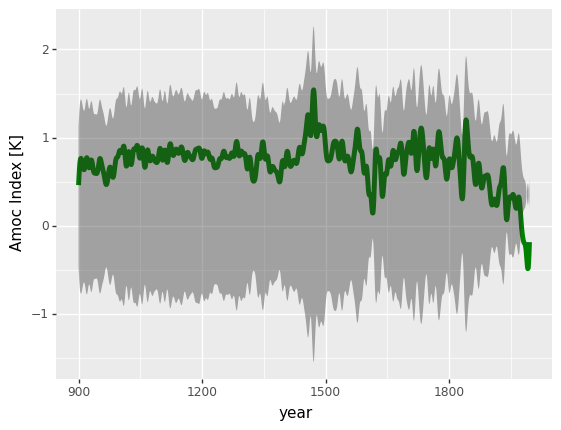

<ggplot: (8767356636037)>

In [12]:
(
    ggplot(df)  
    + aes(x="year", y="Amoc Index [K]")  
    + geom_line(colour = 'green', size = 2) 
    + geom_ribbon(aes(ymax = "lower bound 95%",ymin = "upper bound 95%"),alpha = 0.4)
)

In [13]:
new = df.dropna()

In [14]:
o = len(df.axes[0])
n = len(new.axes[0])
print(f"Deleted Rows= {o-n}")

Deleted Rows= 0


In [15]:
column = []
for col in new.columns:
    column.append(col)

In [16]:
for i in column:
  mean = np.mean(df[i])
  print(f"Mean of {i} = {mean}")

Mean of year = 1447.5
Mean of Amoc Index [K] = 0.7219001483467156
Mean of 2-sigma = 0.6956724902189796
Mean of lower bound 95% = -0.7219001483467156
Mean of upper bound 95% = 1.4175726385656935


In [17]:
for i in column:
  median = np.median(df[i])
  print(f"Median of {i} = {median}")

Median of year = 1447.5
Median of Amoc Index [K] = 0.76434505
Median of 2-sigma = 0.70361276
Median of lower bound 95% = -0.76434505
Median of upper bound 95% = 1.44668419


In [18]:
from scipy import stats
for i in column:
  mode = stats.mode(df[i])
  print(f"Mode of {i} = {mode[0][0]}")

Mode of year = 900
Mode of Amoc Index [K] = -0.48316190000000003
Mode of 2-sigma = 0.66905654
Mode of lower bound 95% = -1.5429153
Mode of upper bound 95% = 0.23960428


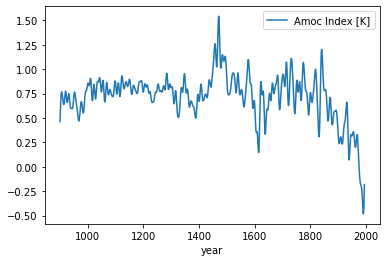

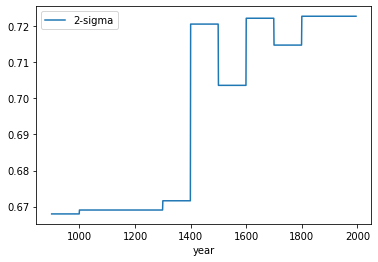

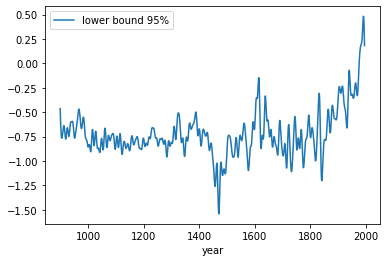

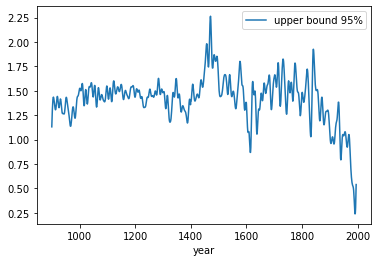

In [19]:
d = 0
for i in column:
  if i != 'year':
    fig = df.plot(x="year", y=[i])
    d = d + 1

In [20]:
!sudo apt-get install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,562 kB of archives.
After this operation, 3,522 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ jags 4.3.0-3bionic0 [1,562 kB]
Fetched 1,562 kB in 0s (19.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 155222 files and directories curre

In [21]:
import pyjags

In [22]:
pyjags

<module 'pyjags' from '/usr/local/lib/python3.7/dist-packages/pyjags/__init__.py'>

In [23]:
plt.style.use('ggplot')

In [24]:
N = len('year')
alpha = len('Amoc Index [K]')
beta = len('lower bound 95%')
sigma = len('upper bound 95%')

In [25]:
# Generate x uniformly
x = np.random.uniform(0, 100, size=N)
# Generate y as alpha + beta * x + Gaussian error term
y = np.random.normal(alpha + x*beta, sigma, size=N)

In [26]:
# JAGS model code
code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dnorm(0.0, 1.0E-4)
    beta ~ dnorm(0.0, 1.0E-4)
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(1.0E-3, 1.0E-3)
}
'''

In [27]:
# Load additional JAGS module
pyjags.load_module('glm')

In [28]:
# Initialize model with 4 chains and run 1000 adaptation steps in each chain.
# We treat alpha, beta and sigma as parameters we would like to infer, based
# on observed values of x and y.
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4, adapt=1000)
 
# 500 warmup / burn-in iterations, not used for inference.
model.sample(500, vars=[])
 
# Run model for 1000 steps, monitoring alpha, beta and sigma variables.
# Returns a dictionary with numpy array for each monitored variable.
# Shapes of returned arrays are (... shape of variable ..., iterations, chains).
# In our example it would be simply (1, 1000, 4).
samples = model.sample(1000, vars=['alpha', 'beta', 'sigma'])

sampling: iterations 2000 of 2000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


In [29]:
# Use pandas three dimensional Panel to represent the trace:
#x = pd.DataFrame({k: v.squeeze(0) for k, v in samples.items()})
trace = pd.Panel({k: v.squeeze(0) for k, v in samples.items()})
#trace.axes[0].name = 'Variable'
##trace.axes[1].name = 'Iteration'
#trace.axes[2].name = 'Chain'
return trace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [30]:
x = {k: v.squeeze(0) for k, v in samples.items()}

In [31]:
x

{'alpha': array([[ 5.30967219e-03,  6.12332359e+00, -2.03891012e+01,
         -2.33714725e+01],
        [-6.63770040e+00,  2.93008482e+00, -1.25554075e+01,
         -9.24756070e+00],
        [-1.28771879e+01,  3.85887193e+00,  1.36842640e-01,
          3.63481365e+00],
        ...,
        [ 2.20077333e+01,  2.74352632e+00,  5.05123597e+01,
         -6.81280864e+01],
        [ 2.70314905e+01, -2.70127297e+01,  5.70324180e+01,
         -7.40028052e+01],
        [ 2.30485225e+01, -7.15430780e+00,  2.32729927e+01,
         -6.69122154e+01]]),
 'beta': array([[15.25332163, 14.99831913, 15.15823069, 15.29848945],
        [15.33065838, 15.06539523, 15.16642132, 15.187096  ],
        [15.4522552 , 14.95023278, 15.09211037, 14.81871768],
        ...,
        [14.41311016, 15.25085075, 14.3884764 , 16.0930823 ],
        [14.7385785 , 14.96726036, 14.64295549, 15.99331825],
        [14.5483677 , 15.14984014, 14.64126478, 16.1717012 ]]),
 'sigma': array([[26.42827401, 10.76226311, 13.36212265, 11

In [32]:
# Point estimates:
print(trace.to_frame().mean())
 
# Possible output:
# Variable
# alpha 71.693096
# beta 19.860774
# sigma 49.790683

NameError: ignored

In [33]:
# Bayesian equal-tailed 95% credible intervals:
print(trace.to_frame().quantile([0.05, 0.95]))
 
# Possible output:
# Variable alpha beta sigma
# 0.05 61.98259 19.694937 46.472748
# 0.95 81.27412 20.025410 53.284573

NameError: ignored

In [34]:
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, fontsize='xx-large')
 
    # Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
     # Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    # Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    # Save figure
    plt.tight_layout()
    fig.savefig('{}.png'.format(var))
 
# Display diagnostic plots
for var in trace:
    plot(trace, var)
 
# Scatter matrix plot:
scatter_matrix(trace.to_frame(), diagonal='density')
plt.savefig('scatter_matrix.png')

NameError: ignored